# Анализ закономерностей, определяющих успешность онлайн-игр

**Описание**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные предоставлены до 2016 г.

**Цели и задачи**

- Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Составить портрет пользователя каждого региона.
- Проверить гипотезы о:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Средние пользовательские рейтинги жанров Action и Sports разные.


**План работы**

1. Знакомство с данными.
2. Полный цикл предобработки.
3. Объединение трёх таблиц в одну.
4. Исследовательский анализ данных.
5. Проверка гипотез.
6. Общие выводы.
На каждом этапе - промежуточные выводы.

_________________________

## Знакомство с данными

### Подготовка библиотек

Загрузим все необходимые библиотеки, которые пригодятся в работе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import stats as st
from scipy.stats import binom

### Выгрузка данных

In [2]:
df = pd.read_csv('/datasets/games.csv')

### Общее знакомство

In [3]:
df.info()
display(df.describe())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Промежуточные выводы

Данные представлены в следующем формате:\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В данных видны пропуски (больше всего в оценке критиков), также неверное написание наименований, далее приведём всё к нижнему регистру.\
Также замечено использование знаков препинания в наименовании игры.\
Помимо этого, неверно определены типы данных: год выхода игры, оценка критиков и оценка пользователей.

## Предобработка данных

### Замена названий

Приведём все текстовые данные к нижнему регистру.

In [4]:
df.columns = map(str.lower, df.columns) #переименуем названия столбцов

In [5]:
df['name'] = df['name'].str.lower() #переименуем названия игр

In [6]:
df['platform'] = df['platform'].str.lower() #переименуем названия платформи

In [7]:
df['genre'] = df['genre'].str.lower() #переименуем названия жанров

In [8]:
df['rating'] = df['rating'].str.lower() #переименуем названия рейтингов

In [9]:
df.head(10) #проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Все текстовые данные приведены к единому виду - нижний регистр, snake_case.

### Проверка дубликатов

Проверим явные дубликаты.

In [10]:
df.duplicated().sum()

0

Теперь займёмся неявными дубликатами - они возможны в неправильном написании текстовой информации, а именно название игры, название платформы, жанр. Проверим все уникальные наименования и заменим неявные дубликаты при их наличии.

In [11]:
df['name'].nunique()

11559

Обработать столько уникальных значений игр невозможно - оставим их как есть.

In [12]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [13]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Все платформы и жарны уникальны, неявные дубликаты отсутствуют. Проверим также неявные дубликаты по общим параметрам - одновременно по имени, платформе и году релиза.

In [14]:
df.groupby(['name', 'year_of_release', 'platform']).filter(lambda x: len(x) > 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


Дубликат обнаружен. Так как указаны одинаковые рейтинги и оценки, полагаю, лучше объединить данные (добавить к eu_sales значение). Видимо было ошибочно записано ещё раз.

In [15]:
df.loc[604, 'eu_sales'] = 0.23
df = df.drop(index=16230).reset_index(drop=True) #переназначим индексы после удаления дублирующей строки.

Проверим, остались ли ещё неявные дубликаты.

In [16]:
df.groupby(['name', 'year_of_release', 'platform']).filter(lambda x: len(x) > 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Отлично, дубликатов больше нет, двигаемся дальше.

In [17]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Обработка пропусков

Посмотрим, где встречаются пропуски, что можно заполнить, а что придётся удалить. Начнём по порядку столбцов.

In [18]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Проверим, возможно сможем заполнить данные, найдя нужную игру по году выпуска и платформе.

In [19]:
df.loc[(df['year_of_release'] == 1993.0) & (df['platform'] == 'gen')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,shining force ii,gen,1993.0,strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,super street fighter ii,gen,1993.0,fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,ecco: the tides of time,gen,1993.0,adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,street fighter ii': special champion edition (...,gen,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,streets of rage 3,gen,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,dynamite headdy,gen,1993.0,platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,beyond oasis,gen,1993.0,role-playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


К сожалению, заполнить достоверно пропуски в названии невозможно, удалим их.

In [20]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [21]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16370,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16402,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16445,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16455,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков года релиза всего 1.6%, потеря этих данных не критичны, для очистки удалим их.

In [22]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'].isna().sum()

0

In [23]:
df['genre'].isna().sum()

0

Пропуски в жанрах удалились вместе с пропусками в названиях. Далее проверим пропуски оценке критиков.

In [24]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков очень много, заполнить их нечем. Оставим эти пропуски, заменить их нечем.

Перейдём к оценке пользователей.

In [25]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Во-первых, все значения считываются как текст, во-вторых, помимо пропуска присутствует аббревиатура tbd. В библиотеке pandas такое обозначение присваивается текстовому пропуску. Приведём все пропуски в NaN, а позже сменим данные на целочисленные.

In [26]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [27]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Стало заметно, что оценка пользователей отсутствует и там, где оценка критиков, хоть и в меньшем количестве. Возможно это был программный сбой. Оставим эти пропуски без изменений.

Перейдём к пропускам в рейтинге.

In [28]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [29]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Ознакомимся с актуальным рейтингом:

Е - для всех, действует по настоящее время, до 98 года был К-А (для взрослых и детей), также в него включили группу ЕС (для детей от 3х лет)

Е10+ - для детей старше 10 лет.

Т - для подростков.

М - для взрослых от 17 лет.

АО - только для взрослых от 18 лет.

RP - рейтинг ожидается, примерно как М.

Так как мы будем исследовать влияние на популярность игр и прогнозировать на будущее, лучше переименовать все рейтинги на актуальные.

In [30]:
df['rating'] = df['rating'].replace(['k-a', 'ec'], 'e', regex=True)
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'ao', 'rp'], dtype=object)

Пропусков немалое количество, обработать их невозможно, поставим заглушку 'j', так как вероятно пропуски возникли в основном на японском сегменте.

In [31]:
df['rating'] = df['rating'].fillna('j')

Обработка пропусков на этом завершена. Посмотрим, сколько данных мы очистили и сколько удалось оставить.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [33]:
100 - 100*len(df['name'])/16715

1.627280885432242

После очистки данных мы потеряли только 1.6%.

In [34]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Причины возникновения пропусков: 

- в столбце с названием игры пропуски могли появиться из-за ошибки записи данных, программного сбоя из-за чего задублировались показатели игры. По той же причине возникли пропуски в жанре.
- пропуски в столбце с город релиза тоже похоже на программный сбой - этих пропусков относительно мало, восстановить их не удалось. Также возможно пропущены данные в годе релиза игры на платформе, которая на момент релиза игры ещё не существовала - в данном случае пропуск сигнализирует о том, что релиз игры старше платформы, по которой обнаружен пропуск.
- пропуски в оценках критиков и пользователей могут возникнуть из-за отсутствия этих оценок - игры вышли недавно или не пользовались спросом на определённых платформах, поэтому их попросту не оценили.
- пропуски в рейтинге возникли из-за различной системы оценки в Японии и Европе, Северной Америке. В таблице представлен рейтинг игр, который используется в Европе и Северной Америке, в Японии же используется другой. Возможно пропуски в играх, вышедших в Японии, либо же в Японии присвоен иной рейтинг, поэтому данные отсутствуют.

### Преобразование типов

Год релиза и оценка критика в исходном датафрейме считывается нецелочисленными данными, оценка пользователей - не числовой тип данных. Оценку критика привести к целочисленному типу невозможно из-за наличия пропусков. Преобразуем типы на правильные. 

In [35]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [36]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Суммарные продажи по регионам

Добавим в таблицу новый столбец - суммарные продажи во всех регионах.

In [38]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,j,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,j,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,j,0.01
16439,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,j,0.01
16440,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,j,0.01
16441,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,j,0.01


### Промежуточные выводы

Были приведены все тектовые данные к верному формату для дальнейшей работы. Данные проверены на дубликаты - явных не обнаружено, неявные удалены. Также были обработаны пропуски - там, где это возможно, они были заполнены. В иных случах были удалены. Потеря данных составила 1.6%.

Также были отредактированы наименования в рейтинге игр - сменены на актуальные для возможности дальнейшего прогнозирования. 

Изменены типы данных на корректные.

В конце к исходному датафрейму добавлен столбец с итоговым доходом от каждой игры.

Данные подготовлены к проведение исследовательского анализа.

## Исследовательский анализ данных

### Выпущенные игры по годам

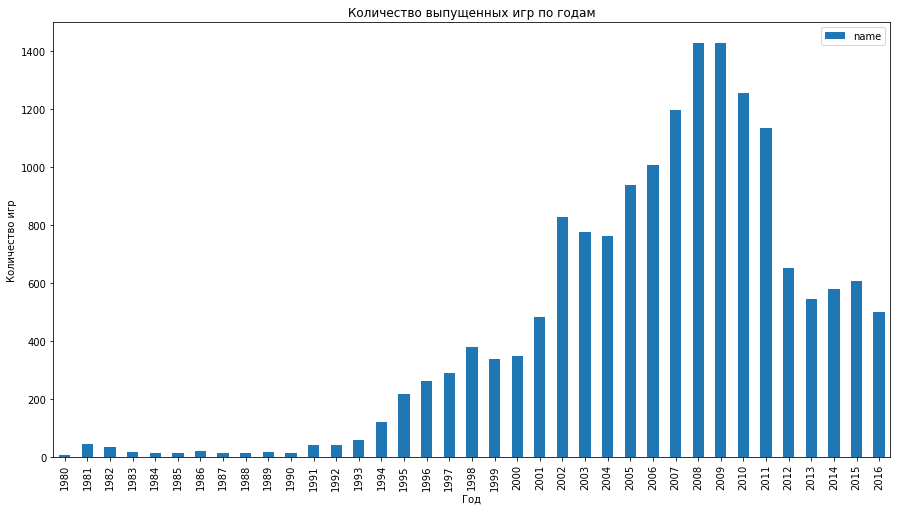

In [40]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,8))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Примерно с 1994 года игры стали выпускаться чаще, сильный скачок резилов наблюдается с 1999 по 2002, также с 2005 по 2008. С 2008 по 2009 выпуск игр держится равномерно, после чего идёт спад всполь до 2013 года. После плавный рост. 

Резкий скачок с 2005 года можно объяснить сменой вектора интересов и быстрым развитием технологий, а вот спад скорее всего связан с необходимостью втискиваться в системные ограничения с возможностью сохранить и улучшить качество графики и контента.

Рассматривать данные за все периоды нет смысла - с ростом количества и разнообразия игр можно хорошо просмотреть выборочность потребителя и выявить закономерности, которые приводят к успеху. Также эти данные отражают и ближайшую реальность - среди небольшого количества игр можно просмотреть, что именно интересует пользователей.

### Продажи на платформах по годам

Сначала найдём самые доходные платформы.

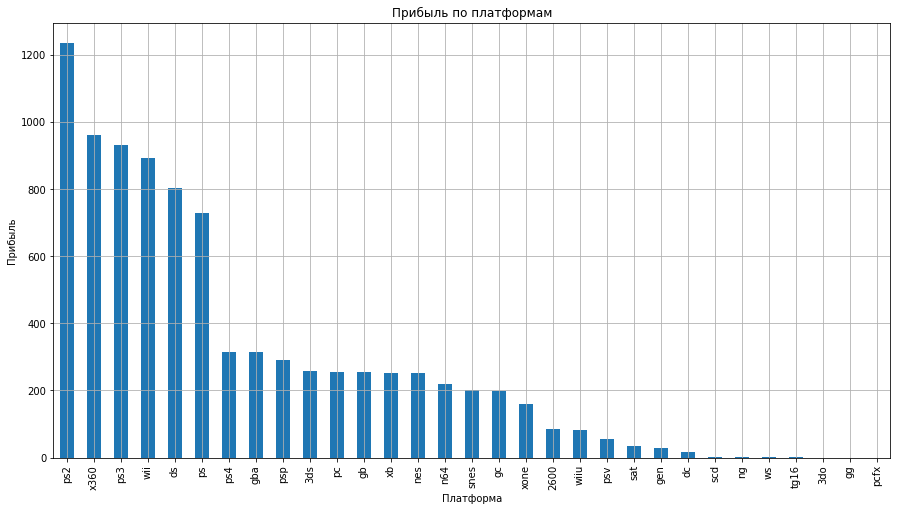

In [41]:
(
    df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar', x='platform', y='total_sales', grid=True, figsize=(15,8))
)
plt.title('Прибыль по платформам')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()

Благодаря графику сразу видны самые прибыльные платформы. Выберем 5 для дальнейшего исследования.

In [42]:
top_platform = df.query('platform in ("ps2", "x360", "ps3", "wii", "ds")')
top_platform['platform'].value_counts()

ps2     2127
ds      2121
ps3     1305
wii     1286
x360    1232
Name: platform, dtype: int64

Построим распределение продаж по годам для каждой платформы.

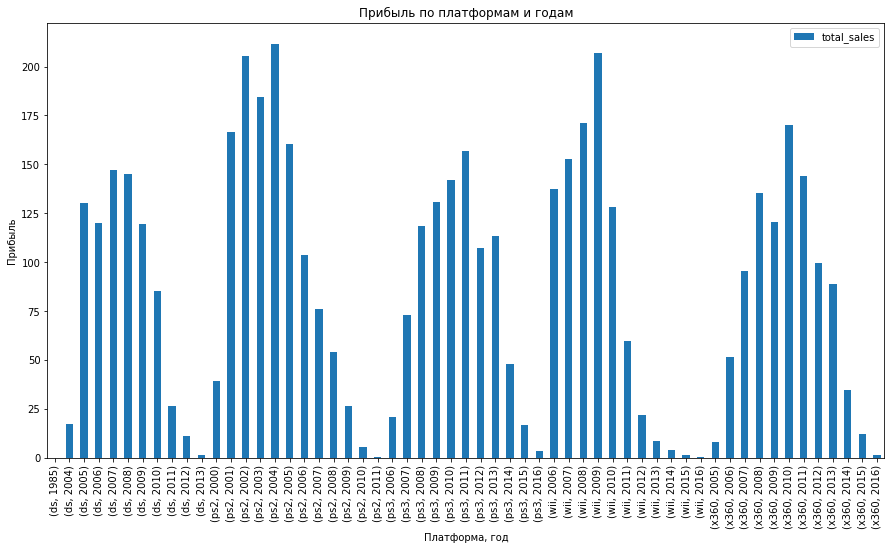

In [43]:
(
top_platform.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Прибыль по платформам и годам')
plt.xlabel('Платформа, год')
plt.ylabel('Прибыль')
plt.show()

Обнаружен выброс у платформы ds - игра от 1985 года, когда платформы ещё не существовало. Проверим, что это.

In [44]:
df.query('platform == "ds" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,j,0.02


Проверено, игра вышла в 2010 году. Изменим значение на верное. Возможно эта аномалия возникла из-за неверное заполнения исходной базы.

In [45]:
df.loc[15704,['year_of_release']] = 2010
top_platform = df.query('platform in ("ps2", "x360", "ps3", "wii", "ds")')

Посмтроим график уже без аномального значения.

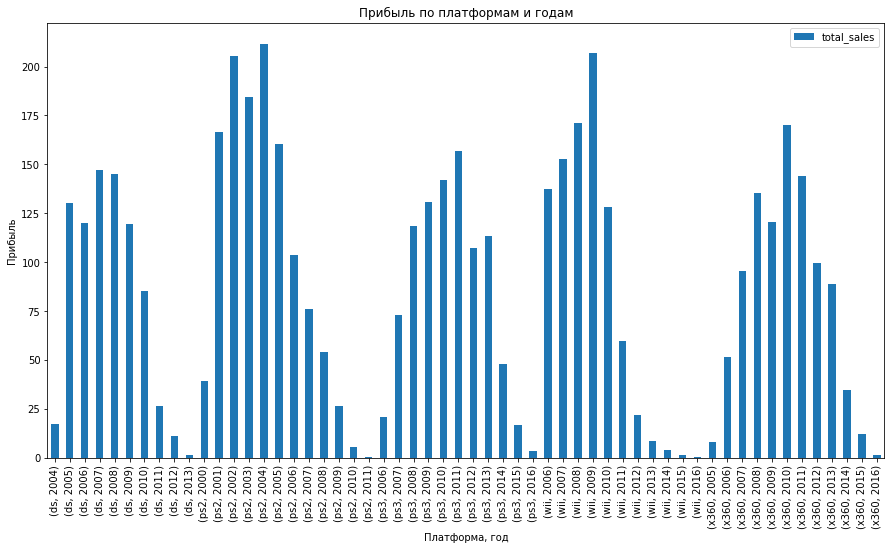

In [46]:
(
top_platform.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Прибыль по платформам и годам')
plt.xlabel('Платформа, год')
plt.ylabel('Прибыль')
plt.show()

По графику видно, что широта показателей по платформам примерно одинаковая. Это говорит о примерной продолжительности цикла жизни каждой платформы. Рассчитаем его.

In [47]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Выбор актуального периода

После построения всех графиков стало ясно, что для выбора актуального периода, по которому далее будем прогнозировать популярность игр, необходимо брать с начала роста прибыли по самым актуальным платформам, чтобы корректно отметить рост интереса и динамику цены. Тем не менее важно иметь представления об актуальных предпочтениях пользователей, а также учитывать срок жизни платформ - на момент 2017 года им не должно быть больше 5 лет. В связи с чем выберем период с 2013 года.

In [48]:
smal_relevant_df = df.query('year_of_release >= 2013')
smal_relevant_df.info()
smal_relevant_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


### Выбор перспективных платформ

Так как необходимо спрогнозировать данные на 2017 год, платформы лучше всего выбирать в начале либо на пике их жизненного цикла - то есть на 2017 год платформа должна существовать уже 2-4 года. Посмотрим, какие платформы с 2013 года растут по прибыли. Также для более близкого рассмотрение самых актуальных показателей выделим период с 2013 года отдельно.

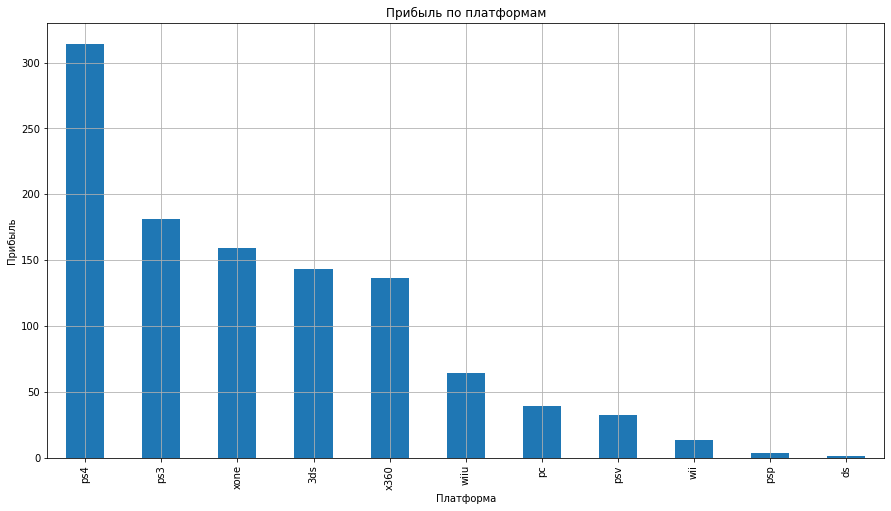

In [49]:
(
    smal_relevant_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar', x='platform', y='total_sales', grid=True, figsize=(15,8))
)
plt.title('Прибыль по платформам')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()

In [50]:
top_platform = smal_relevant_df.query('platform in ("ps4", "ps3", "xone", "3ds", "x360")')
top_platform['platform'].value_counts()

ps4     392
ps3     345
3ds     303
xone    247
x360    186
Name: platform, dtype: int64

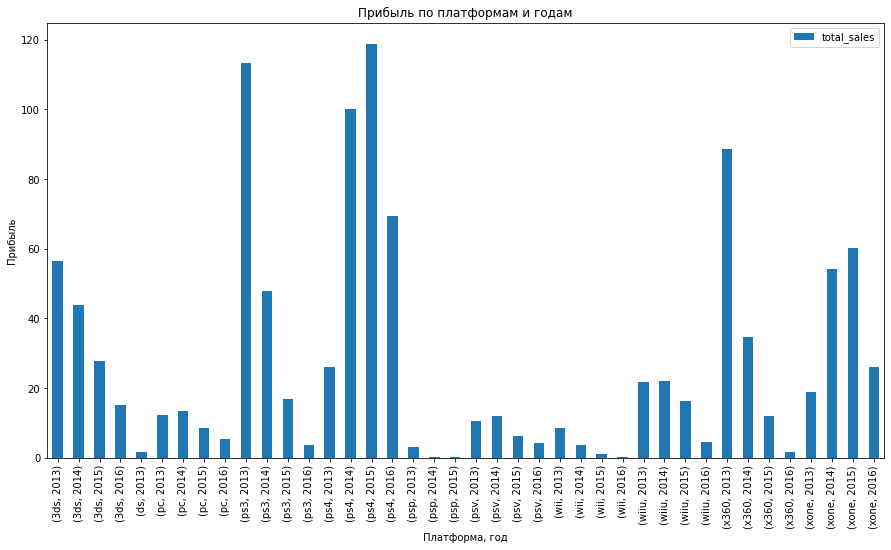

In [51]:
(
smal_relevant_df
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Прибыль по платформам и годам')
plt.xlabel('Платформа, год')
plt.ylabel('Прибыль')
plt.show()

К сожалению на конец 2016 года роста среди платформ не наблюдается. Самыми прибыльными могут оказаться 3ds, ps4 и xone - их падение продаж ещё не подошло к окончанию жизненного цикла платформы, на 2016 год они обладают большей прибылью, нежели остальные. Самая прибыльная - ps4.

### Разброс продаж по платформам

Исследуем аномальные выбросы прибыли по платформам.

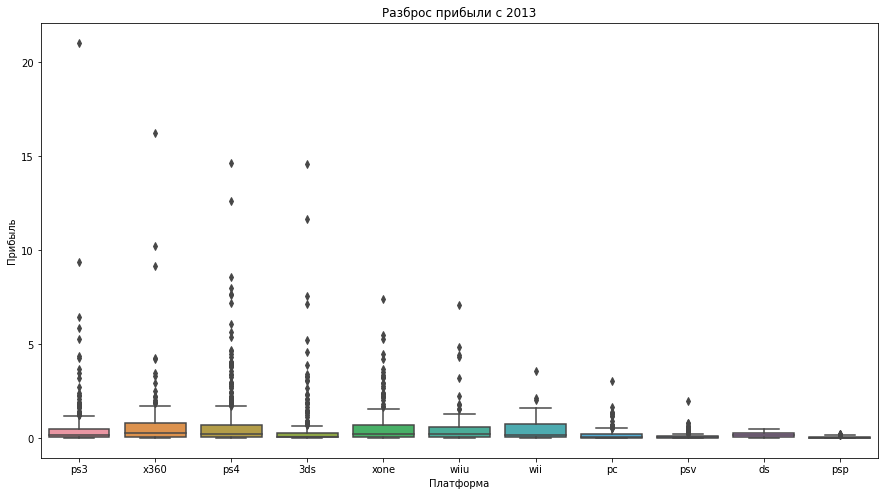

In [53]:
plt.figure(figsize=(15,8))
seaborn.boxplot(data=smal_relevant_df, x='platform', y='total_sales')
plt.title('Разброс прибыли с 2013')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()

Приблизим средние показатели по платформам, чтобы нагляднее разглядеть среднюю прибыль без выбросов.

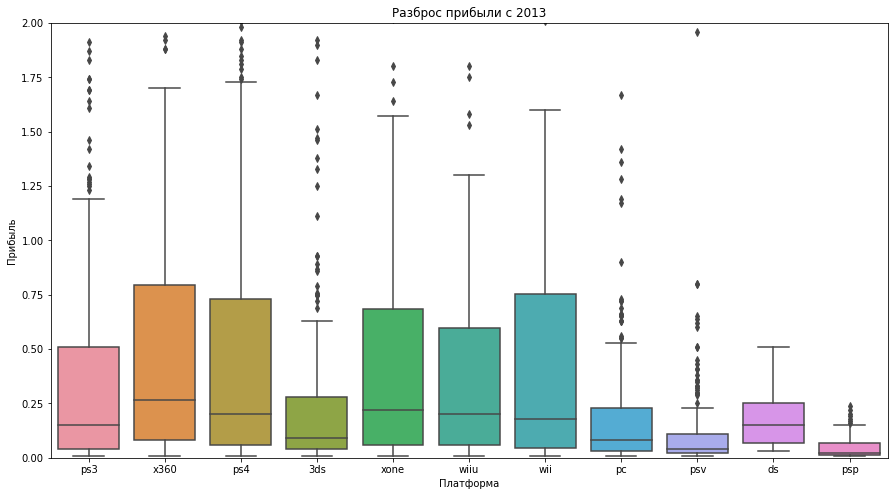

In [54]:
plt.figure(figsize=(15,8))
seaborn.boxplot(data=smal_relevant_df, x='platform', y='total_sales')
plt.ylim(0,2)
plt.title('Разброс прибыли с 2013')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()

Платформы с аномальной прибылью от игр - ps3, x360, ps4, 3ds, xone.\
Также по ширине "прямоугольника" и высоте медианы можно вычислить самые надёжные платформы для вложения - это x360 (самая большая медиана, широкий разброс 1 и 3 квартилей и немало аномальных выбросов прибыли), xone wii, ps4, ps3 - прибыль по ним в среднем самая широкая. При этом просматриваются стабильные выбросы аномалий, что позволит сделать ставку на высокие показатели прибыли, а в случае неудачного риска, всё равно принесёт приемлемый доход.

### Влияние оценок критиков и пользователей на примере платформы ps4

Сначачала посмотрим на таблицу корреляции.

In [55]:
smal_relevant_df.query('platform == "ps4"').pivot_table(index='name', values=['critic_score','user_score', 'total_sales']).corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


Оценка критиков в незначительной мере влияет на продажи, несильно больше влияет на оценку пользователей. В то время как оценка пользователей никак не влияет на продажи.

Построим диаграммы рассеяния.

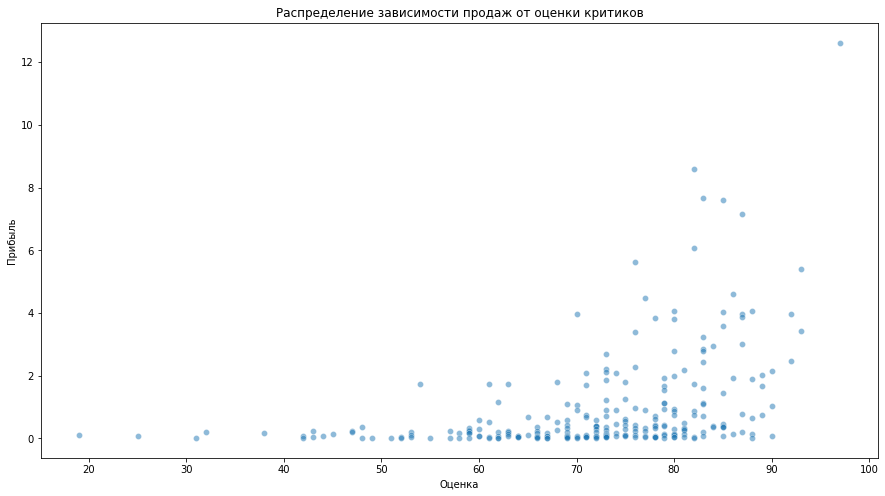

In [56]:
plt.figure(figsize=(15, 8))

seaborn.scatterplot(data=smal_relevant_df.query('platform == "ps4"'),  x='critic_score', y='total_sales', alpha=0.5)

plt.title('Распределение зависимости продаж от оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Прибыль')

plt.show()

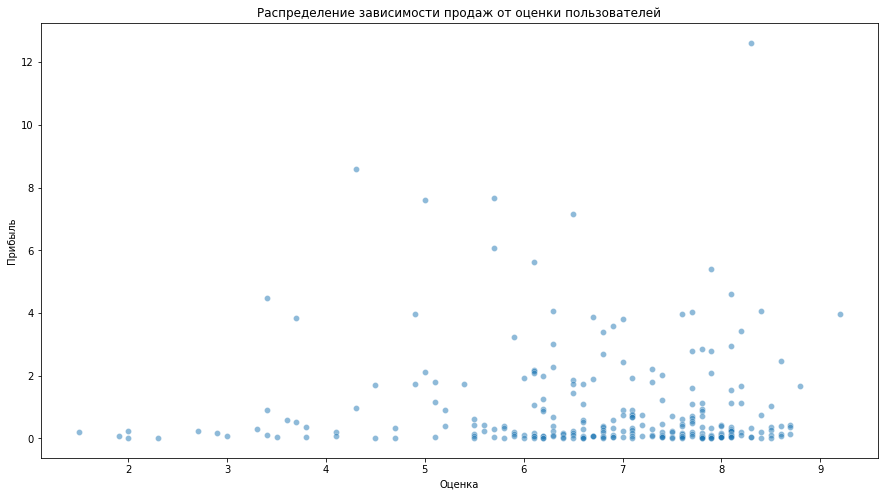

In [57]:
plt.figure(figsize=(15, 8))

seaborn.scatterplot(data=smal_relevant_df.query('platform == "ps4"'),  x='user_score', y='total_sales', alpha=0.5)

plt.title('Распределение зависимости продаж от оценки пользователей')
plt.xlabel('Оценка')
plt.ylabel('Прибыль')

plt.show()

Оценка пользователей очень слабо влияет на продажи - в любом случае, пользователь уже купил игру и принём платформе доход. На средний оценках пользователей есть пики прибыли, что говорит о популярности игры, на высоких оценках пользователей немало показателей прибыли по нижней границе. 

А заодно посмотрим, влияет ли оценка критиков на оценку пользователей.

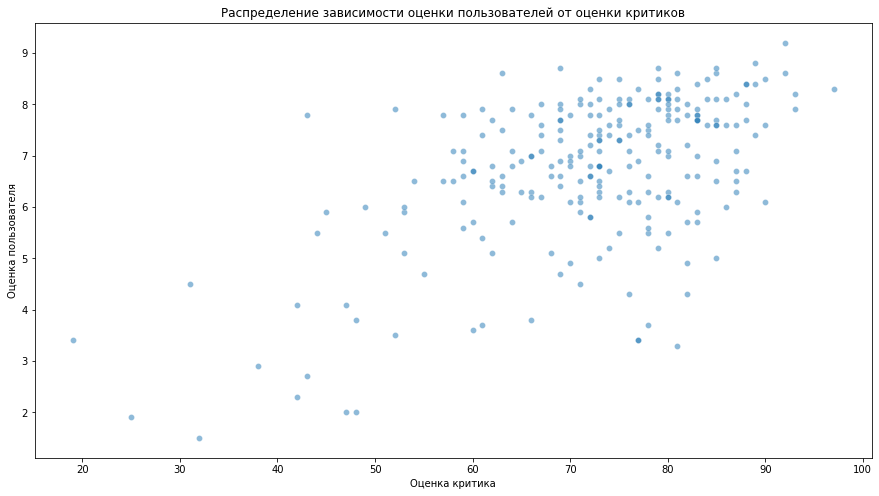

In [58]:
plt.figure(figsize=(15, 8))

seaborn.scatterplot(data=smal_relevant_df.query('platform == "ps4"'),  x='critic_score', y='user_score', alpha=0.5)

plt.title('Распределение зависимости оценки пользователей от оценки критиков')
plt.xlabel('Оценка критика')
plt.ylabel('Оценка пользователя')

plt.show()

Общий рост и взаимосвязь наблюдаются - с ростом оценки критиков растут и оценки пользователей, однако немало и выбивающихся показателей.

Сравним данные топ 5 популярными платформами за весь период наблюдений. Сначала посмотрим общую картину - выведем таблицу корреляции по общей закономерности всех платформ.

In [59]:
top_platform.pivot_table(index='name', values=['critic_score','user_score', 'total_sales']).corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.379373,0.523407
total_sales,0.379373,1.000000,0.013607
user_score,0.523407,0.013607,1.000000


Оценка критиков и пользователей почти никак не влияют на общие продажи.

### Сравнение влияния оценок критиков и пользователей на других платформах

Теперь посмотрим ситуацию по остальным платформам. Для этого выведем графики на экран и посчитаем корреляцию влияния оценки критиков на продажи для остальных топ 5.

Таблица корреляции для ps3
              critic_score  total_sales
critic_score      1.000000     0.334285
total_sales       0.334285     1.000000
Таблица корреляции для xone
              critic_score  total_sales
critic_score      1.000000     0.416998
total_sales       0.416998     1.000000
Таблица корреляции для 3ds
              critic_score  total_sales
critic_score      1.000000     0.357057
total_sales       0.357057     1.000000
Таблица корреляции для x360
              critic_score  total_sales
critic_score      1.000000     0.350345
total_sales       0.350345     1.000000


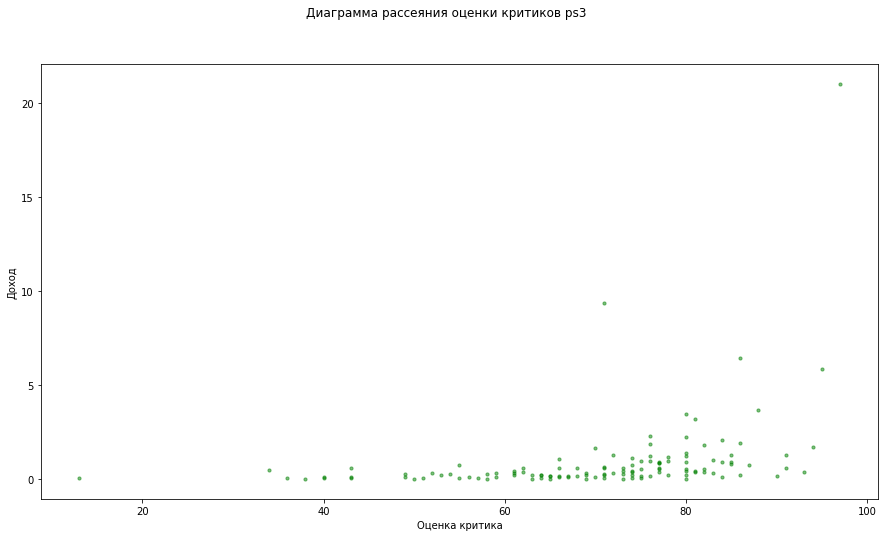

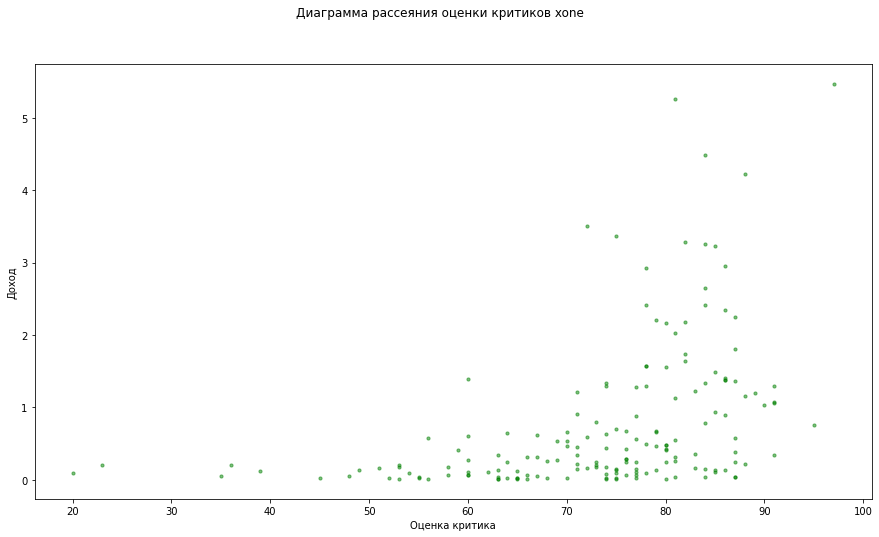

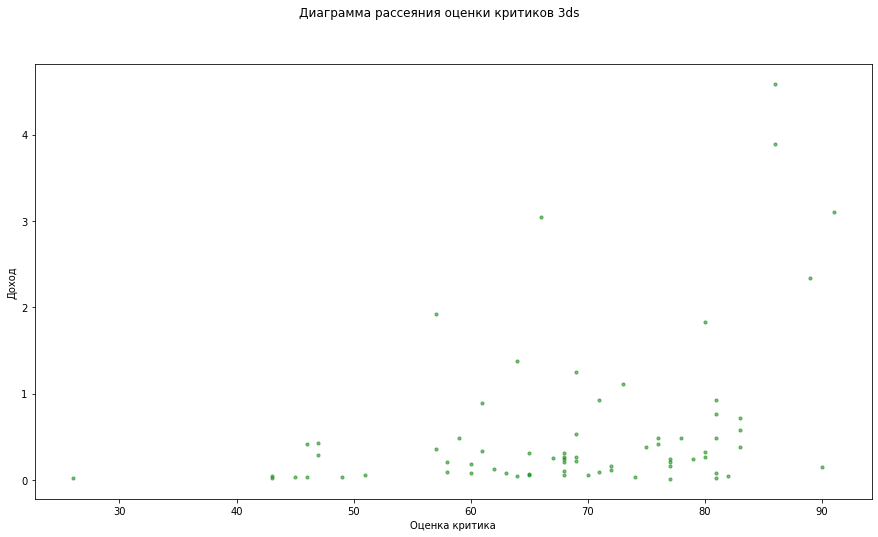

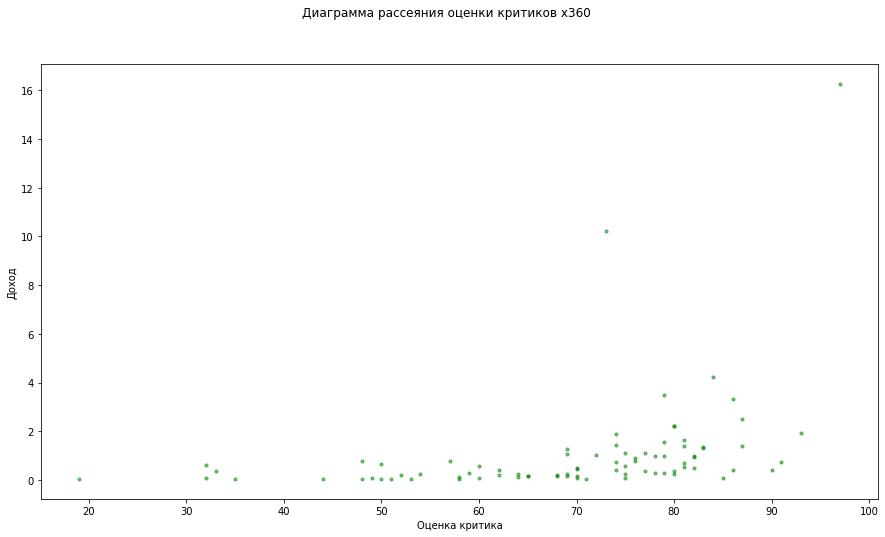

In [60]:
top_5 = ['ps3', 'xone', '3ds', 'x360']
for platform in top_5:
        smal_relevant_df.query('platform == @platform').groupby('platform').plot(kind='scatter',
        x='critic_score' , y='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 10,
        title ='Диаграмма рассеяния оценки критиков ' + platform, xlabel='Оценка критика', ylabel='Доход')
        print('Таблица корреляции для', platform)
        print(smal_relevant_df.query('platform == @platform').pivot_table(
            index='name', values=['critic_score', 'total_sales']).corr())

Теперь выведем графики на экран и посчитаем корреляцию влияния оценки пользователей на продажи для остальных топ 5.

Таблица корреляции для ps3
             total_sales  user_score
total_sales     1.000000    0.002394
user_score      0.002394    1.000000
Таблица корреляции для xone
             total_sales  user_score
total_sales     1.000000   -0.068925
user_score     -0.068925    1.000000
Таблица корреляции для 3ds
             total_sales  user_score
total_sales     1.000000    0.241504
user_score      0.241504    1.000000
Таблица корреляции для x360
             total_sales  user_score
total_sales     1.000000   -0.011742
user_score     -0.011742    1.000000


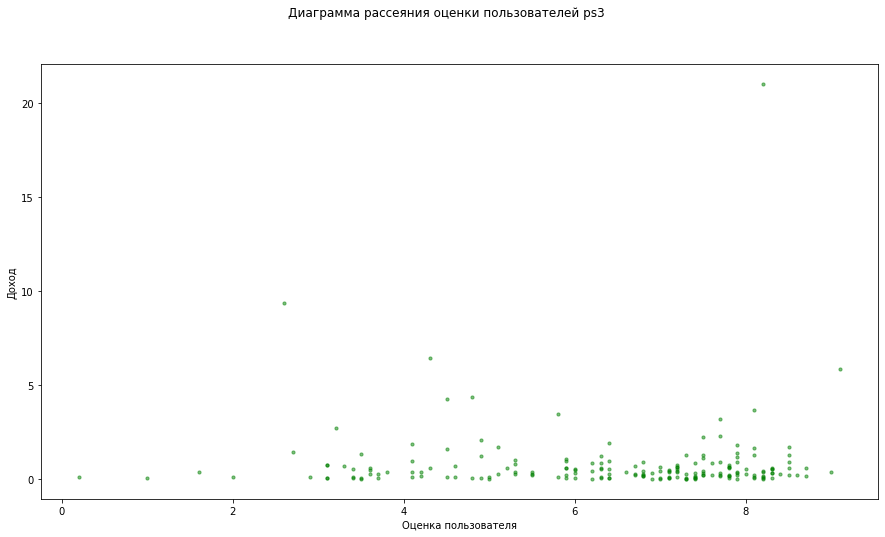

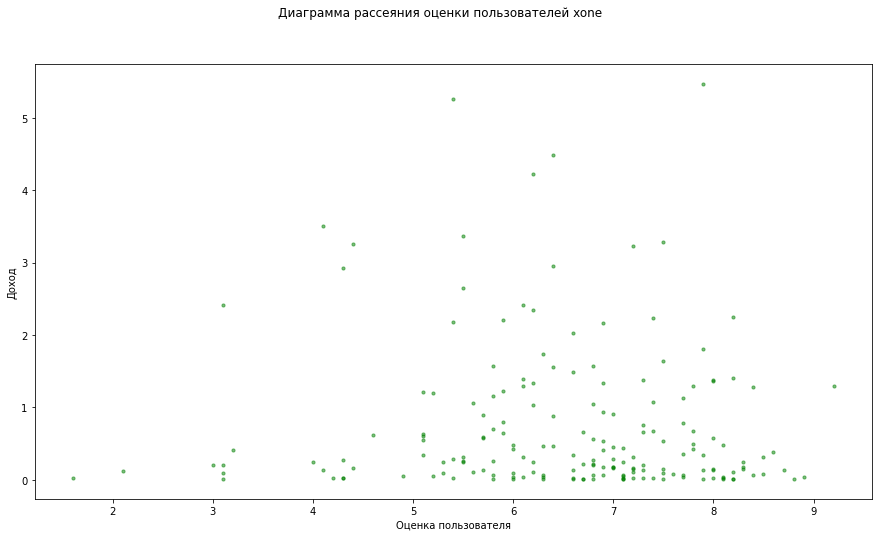

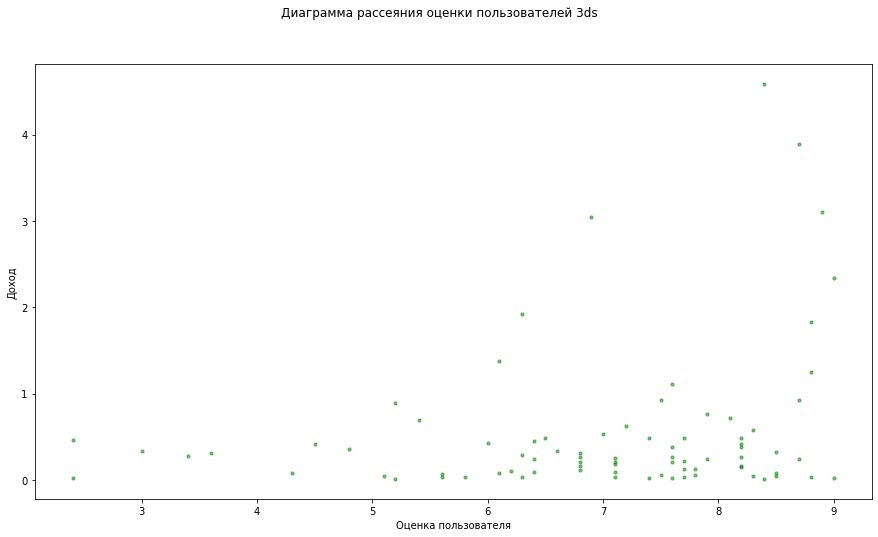

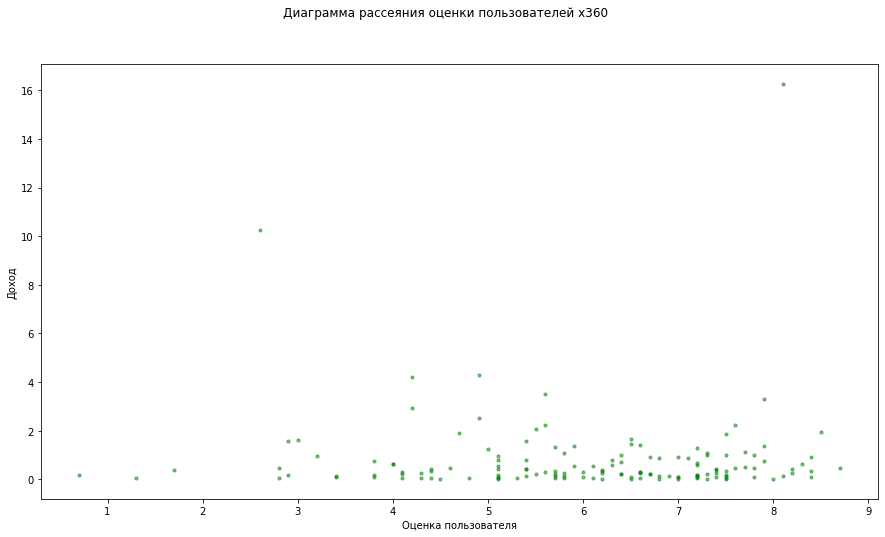

In [61]:
top_5 = ['ps3', 'xone', '3ds', 'x360']
for platform in top_5:
        smal_relevant_df.query('platform == @platform').groupby('platform').plot(kind='scatter',
        x='user_score' , y='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 10,
        title ='Диаграмма рассеяния оценки пользователей ' + platform, xlabel='Оценка пользователя', ylabel='Доход')
        print('Таблица корреляции для', platform)
        print(smal_relevant_df.query('platform == @platform').pivot_table(
            index='name', values=['user_score', 'total_sales']).corr())

*Выводы:*

Пройдясь по всем платформам, на графиках видна слабая взаимосвязь между оценками критиков и общим доходом. От платформы к платформе рассеяния меняются (допустим, у 3dc сильнее видна взаимосвязь, нежели у остальных), тем не менее общая тенденция влияния слабая, что подтверждается рассчитанной корреляцией. 

При этом при поиске взаимосвязи между оценками пользователей и продажами по платформам взаимосвязь вообще не просматривается. Показатели рассчитанной кореляции также мизерные, что говорит об отсутствии даже небольшого влияния.

Больше всего видна хоть какая-то зависимость при анализе оценки пользователей и просмотра её корреляции для платформы 3ds, однако невозможно точно сказать о явном влиянии, очень низкие показатели.

### Исследование жанров

Чтобы иметь общее представление о влиянии жанра игры на итоговую прибыль, построим диаграмму разброса для платформ.

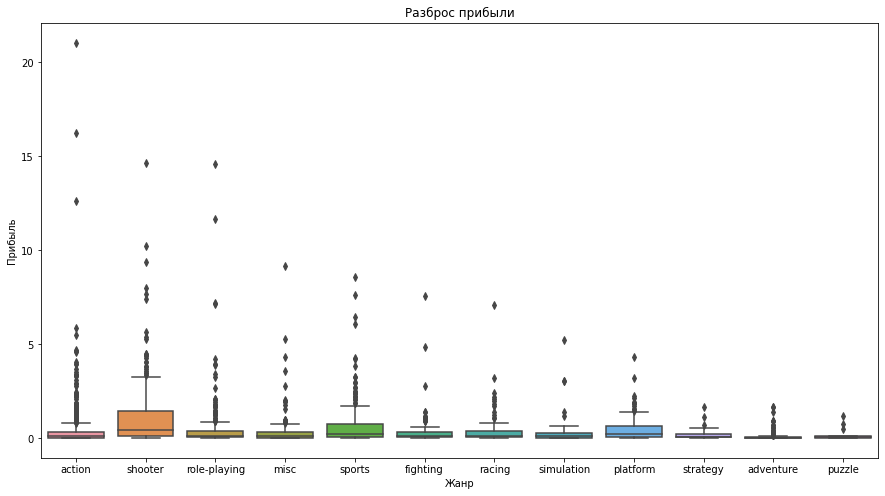

In [62]:
plt.figure(figsize=(15,8))
seaborn.boxplot(data=smal_relevant_df, x='genre', y='total_sales')
plt.title('Разброс прибыли')
plt.xlabel('Жанр')
plt.ylabel('Прибыль')
plt.show()

Есть немало выбросов на жанрах sports, raacing, platform и misc. Остальные жанры проседают по выбросам аномально продажных игр. Приблизим график на нижних значениях и посмотрим, как распределяются средние продажи по жанрам.

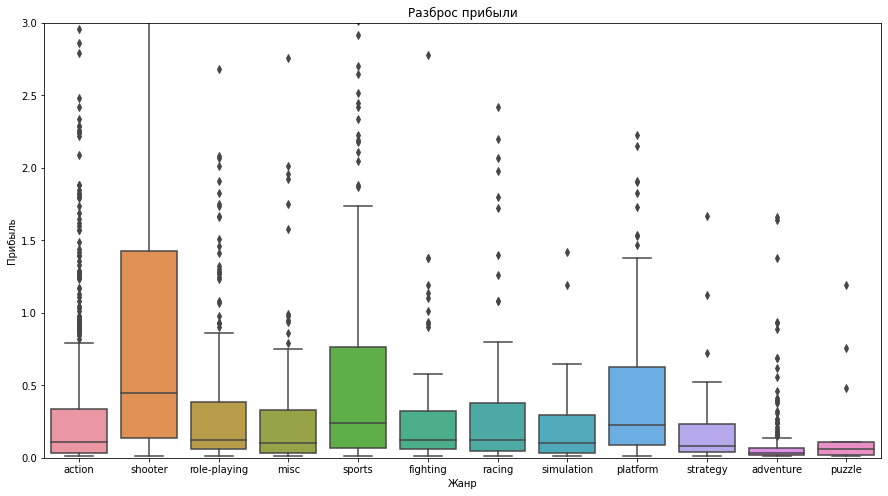

In [63]:
plt.figure(figsize=(15,8))
seaborn.boxplot(data=smal_relevant_df, x='genre', y='total_sales')
plt.title('Разброс прибыли')
plt.ylim(0,3)
plt.xlabel('Жанр')
plt.ylabel('Прибыль')
plt.show()

Самые прибыльные в среднем жанры (и, соответственно, самые надёжные) - shooter, fighting, platform и sports.

### Промежуточные выводы

С 1994 года наблюдается рост выпуска игр, с резкими скачками в 1998, 2002, 2005 и2008. С 2008 по 2009 выпуск стабильный, затем спад до 2013 года, после чего начинается плавный рост, а в 2016 снова спад. Скачок в 2005 году связан с изменением интересов и развитием технологий, а спад - с системными ограничениями. 

Выяснено, что средняя продолжительность жизни платформ составляет около 7 лет. 

Для прогноза популярности игр на 2017 год стоит рассмотреть платформы, находящиеся в начале их жизненного цикла. Был выделен период с 2013 года для более детального анализа. На конец 2016 года прибыльными остаются 3ds, ps4 и xone. Аномальные прибыли наблюдаются у платформ ps3, x360, ps4 и 3ds. Самые надёжные при этом - x360, ps4, wii и xone.

На примере ps4 была исследована закономерность оценки пользователей и критиков и её влияния на продажи. Данные на примере конкретной платформы проверены и на самых популярных за акутальный период - посчитанная корреляция и график распределения примерно одинакова. Оценка критиков слабо влияет на продажи, но есть тенденция к увеличению прибыли с ростом оценки.\
Оценка пользователей менее значима для продаж, при этом высокие оценки могут свидетельствовать о популярности игры.\
Наблюдается общая взаимосвязь: с увеличением оценки критиков растут и оценки пользователей.

Жанры action, shooter, role-playing демонстрируют значительные выбросы, в то время как другие жанры показывают меньше аномальных продаж. При анализе средних продаж по жанрам выявлено, что наиболее прибыльные и надёжные жанры - это shooter, platform и sports.

## Портрет пользователя по регионам

Посмотрим, как отличаются пользователи и их предпочтения по регионам.

### Популярные платформы

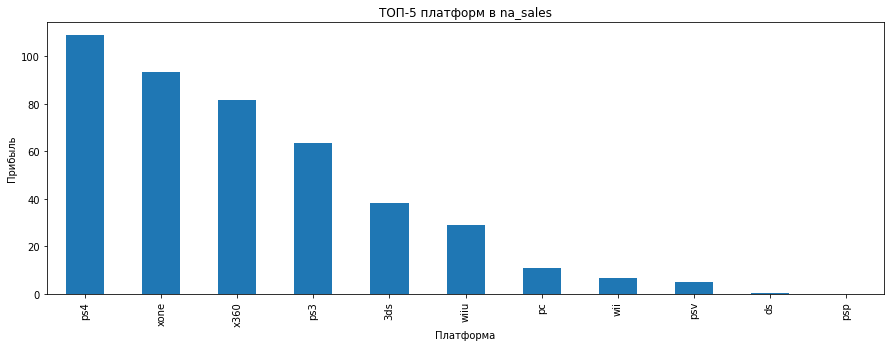

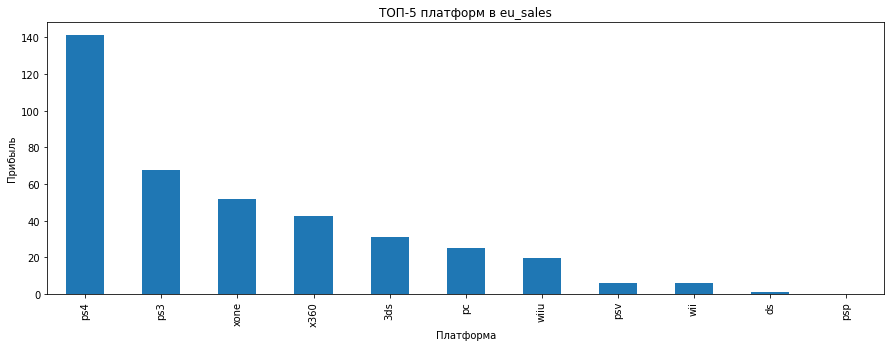

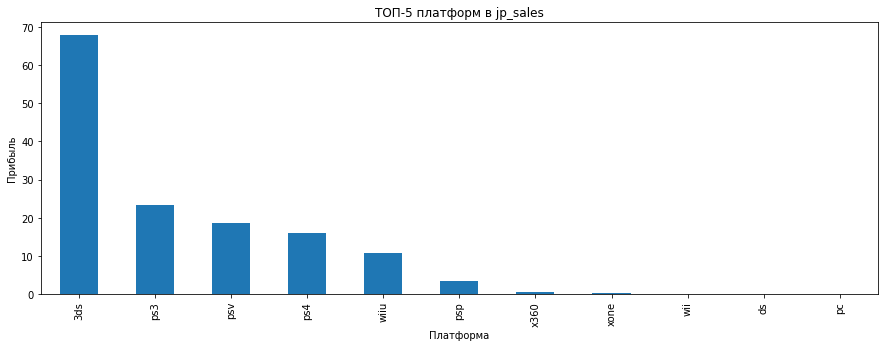

In [64]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_genre = smal_relevant_df.groupby('platform')[region].sum().sort_values(ascending=False)
    region_genre.plot(
        kind ='bar', x='platform', y='total_sales', figsize=(15,5), title ='ТОП-5 платформ в '+region)
    plt.xlabel('Платформа')
    plt.ylabel('Прибыль')
    plt.show()
    plt.show()

В Америке самые прибыльные платформы - ps4, ,xone, x360, ps3 и 3ds, что также совпадает с прибыльными платформами по всем регионам.

В Европе самая популярная платформа - ps4, далее в половину ниже ps3, после xone и x360. Европейцы больше всего предпочитают продукцию ps.

В Японии самая популярная платформа оказалась 3ds, после неё с сильным отставанием ps3, psv, ps4, wiiu.

### Популярные жанры

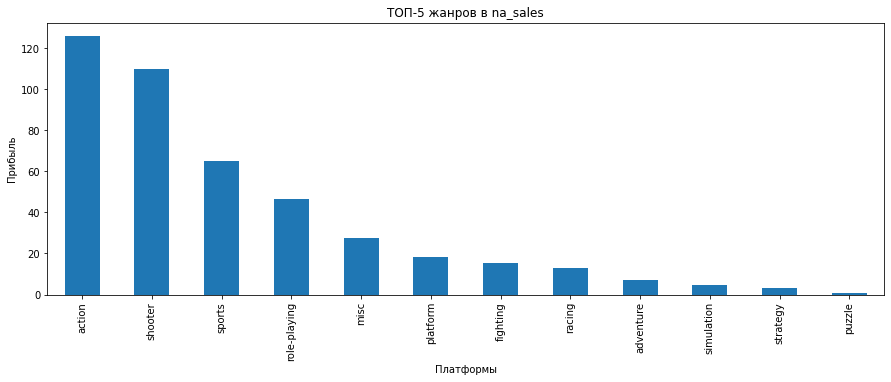

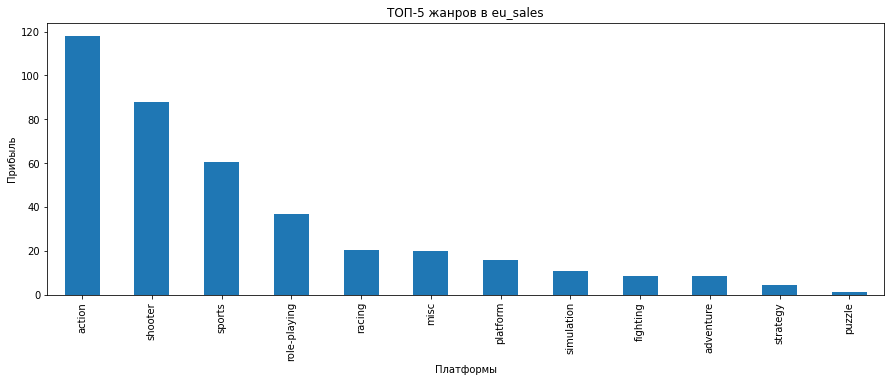

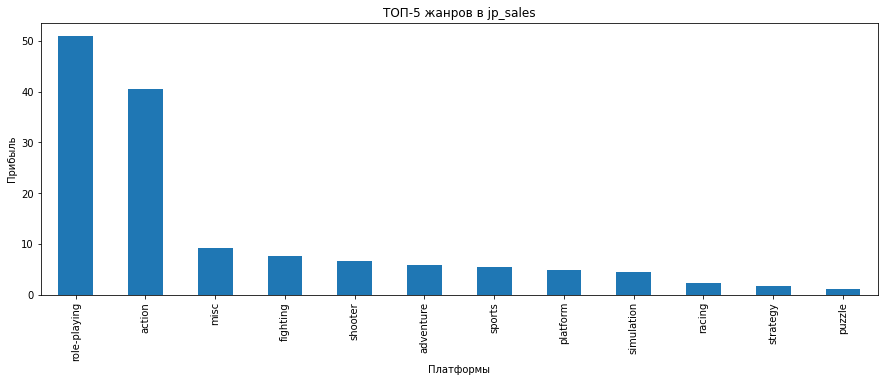

In [65]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_genre = smal_relevant_df.groupby('genre')[region].sum().sort_values(ascending=False)
    region_genre.plot(
        kind ='bar', x='platform', y='total_sales', figsize=(15,5), title ='ТОП-5 жанров в '+region)
    plt.xlabel('Платформы')
    plt.ylabel('Прибыль')
    plt.show()

В Северной Америке лидирующая позиция осталась за action, далее интерес сместился к shooter и только после них идёт sports. Role обогнала misc с сильным преимуществом по доходам.

В Европе лидирующую позицию так и занимает жанр action, а вот shooter сместили sports и вызывают больше интереса у пользователей. В топ-5 вырвался жанр role-playing и сильно обгоняет racing. 

В Японии role-playing всё так же лидирует, значительно повысился интерес с жанрам action - они обгоняют остальные с огромным отрывом по прибыли. Далее японцы проявляют примерно одинаковый интерес к misc, fighting и shooter.

Построим круговые диаграмы распределения топ-5 жанорв по регионам.

Продажи по платформам


,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
Другие,52.49


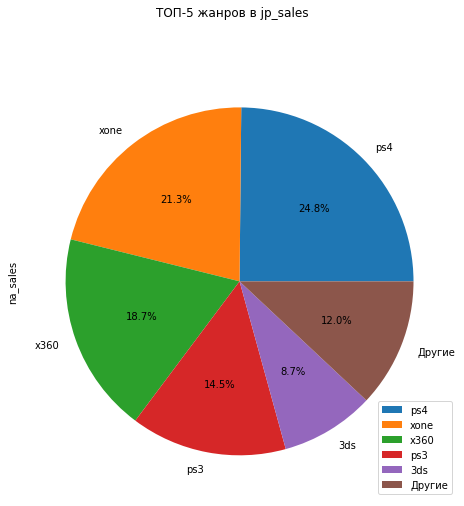

Продажи по платформам


,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
Другие,58.26


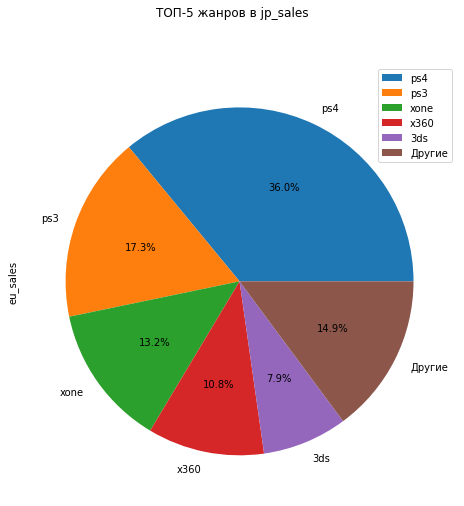

Продажи по платформам


,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
Другие,4.19


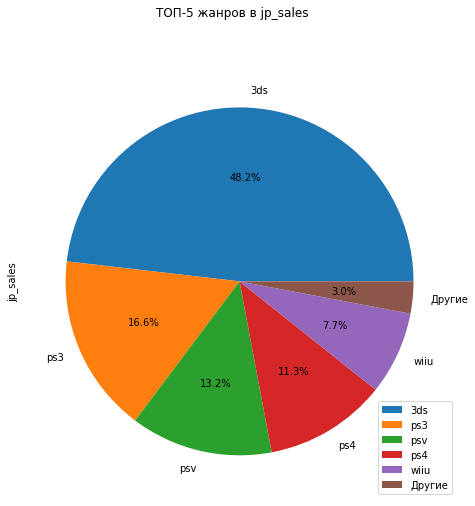

In [66]:
temp, target = smal_relevant_df.copy(), 'platform'
list_region = temp.columns[4:7]
for i in range(3):
    df_ = temp.groupby(target)[list_region[i]].sum().reset_index().sort_values(by=list_region[i], ascending=False)[:5]
    df_ = df_.append({target: 'Другие', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)
    df_.index = df_[target]
    df_.drop(target, axis= 1 , inplace= True)
    print('Продажи по платформам')
    display(df_)
    df_.plot(kind ='pie', figsize=(8,8), autopct='%1.1f%%', subplots=True, title ='ТОП-5 жанров в '+region)
    plt.show()

### Рейтинг ESRB

Исследуем, игры с какими рейтингами более предпочтительны по регионам.

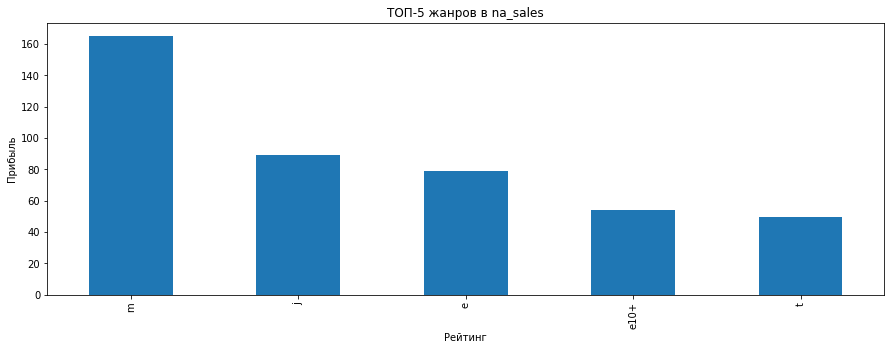

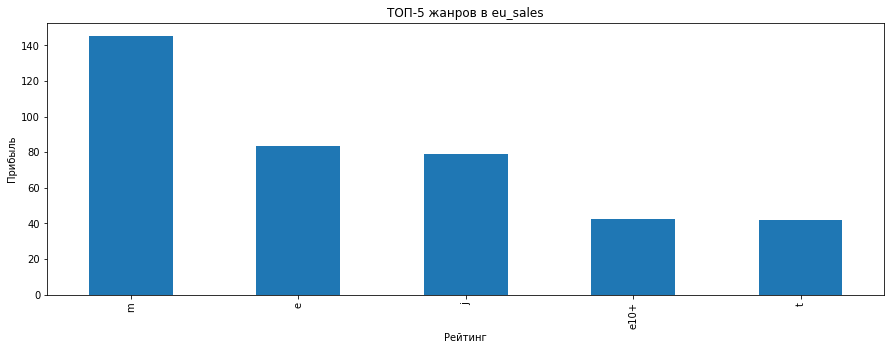

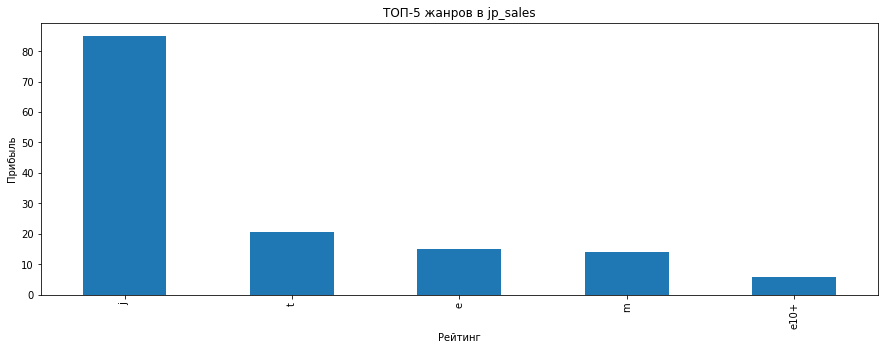

In [68]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    region_rating = smal_relevant_df.groupby('rating')[region].sum().sort_values(ascending=False)
    region_rating.plot(
        kind ='bar', x='rating', y='total_sales', figsize=(15,5), title ='ТОП-5 жанров в '+region)
    plt.xlabel('Рейтинг')
    plt.ylabel('Прибыль')
    plt.show()

В Америке лидирует рейтинг m, после него значительно отстаёт рейтинг j (который является маркером), затем идёт е, e10+ и t. 
Прочие рейтинги совершенно не покупались.

В Европе на первом месте рейтинг m, после e, j (маркер), e10+ и t.

В Японии ситуация иная, на первом месте по популярности и, соответственно, доходности, рейтинг j, после него идёт рейтинг t, e, m, e10+. 

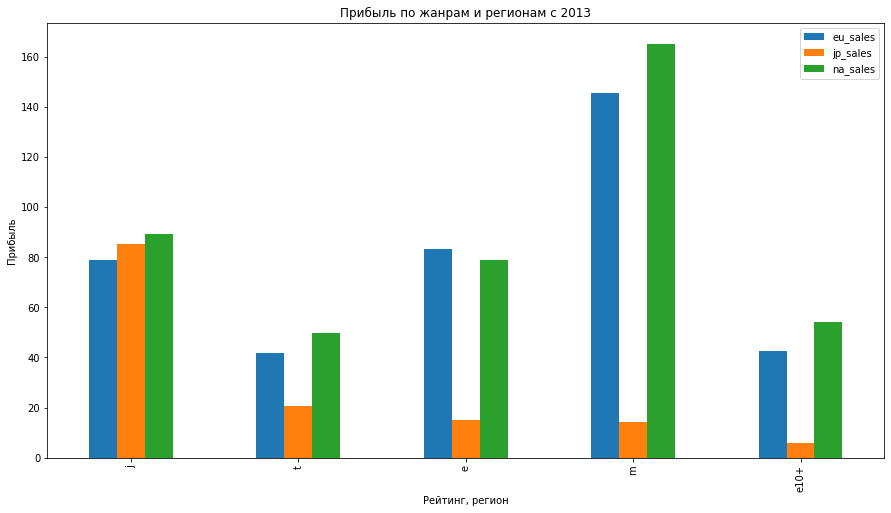

In [70]:
(
smal_relevant_df
    .pivot_table(index=['rating'], values=['jp_sales', 'na_sales', 'eu_sales'], aggfunc='sum')
    .sort_values(by=['jp_sales', 'na_sales', 'eu_sales'], ascending=False)
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Прибыль по жанрам и регионам с 2013')
plt.xlabel('Рейтинг, регион')
plt.ylabel('Прибыль')
plt.show()

Этот график нагрядно демонстрирует разницу в продажах по жанрам и регионам. Благодаря нему видно, что Япония приносит меньше всего доходов, а самые популярные рейтинги в Европе и Северной Америке с 2013 года - m и j, множество используемых игр произведено не в США и Канаде.

Также видно, что пользователи из Японии проявляют иной интерес к жанрам, а вот поведение пользователей из Северной Америки и Европы схоже.

### Промежуточные выводы

Портрет пользователя в Северной Америке: 
- использует платформы ps4, xone, x360 и менее охотно ps3;
- любимые жанры action и shooter, реже sports и role-playing, совсем редко misc;
- преимущетсвенно игры рейтинга m, реже j и е. Играют в основном взрослые люди, любят в том числе иностранные игры.

Портрет пользователя в Европе: 
- использует преимущественно платформу ps4, менее охотно ps3, xone, x360;
- любимые жанры совпадает с Северной Америкой, совсем редко racing и misc;
- совпадает с Северной Америкой.

Портрет пользователя в Японии: 
- использует преимущественно отечественные платформы, в основном 3ds, очень редко ps3, psv, ps4;
- любимые жанры role-playing и чуть в меньшей мере action, остальные игры не особо часто интересуют;
- преимущественно игры рейтинга j, реже t и e. Играют в основном подростки, реже взрослая аудитория, предпочитают игры производства не США и Канады.

## Проверка гипотез

Составим гипотезы, которые помогут определиться с выбором запуска игры, и проверим их.

### Платформы Xbox One и PC

Сформулируем нулевую и альтернативную гипотезы:

Н0: Средние пользовательские рейтинги платформы Xbox One и платформы PC равны\
Н1: Средние пользовательские рейтинги платформы Xbox One и платформы PC не равны

Так как выборки для проверки две, они независимые друг от друга, подойдёт для проверки двухвыборочный t-тест для независимых выборок. Проверять нужно двухстороннюю гипотезу, так как мы проверяем в альтернативной гипотезе неравенство нулевой, t-тест проводим для двусторонней гипотезы.

Коэффициент статистической значимости (aplha) возьмём стандартный - 0.05.

In [71]:
alpha = 0.05 # уровень статистической значимости

hip_df = smal_relevant_df[smal_relevant_df['user_score'] >= 0] #фильтруем пропуски

result = st.ttest_ind(
    hip_df.loc[hip_df['platform'] == 'xone']['user_score'], 
    hip_df.loc[hip_df['platform'] == 'pc']['user_score'])
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Так как не получилось отвергнуть нулевую гипотезу, можно сказать, что средние пользовательские оценки действительно равны между платформами pc и xone. Проверим, так ли это!

In [72]:
print('Средняя оценка пользователей платформы xone:', hip_df.loc[hip_df['platform'] == 'xone']['user_score'].mean())
print('Средняя оценка пользователей платформы pc:', hip_df.loc[hip_df['platform'] == 'pc']['user_score'].mean())

Средняя оценка пользователей платформы xone: 6.521428571428572
Средняя оценка пользователей платформы pc: 6.2696774193548395


Дейсительно, оценка разнится в 0.3, что делает их почти одинаковыми.

### Жанры Action и Sports

Сформулируем нулевую и альтернативную гипотезы:

Н0: Средние пользовательские рейтинги жанра Action и жанра Sports равны\
Н1: Средние пользовательские рейтинги жанра Action и жанра Sports не равны

Так как выборки для проверки две, они независимые друг от друга, подойдёт для проверки двухвыборочный t-тест для независимых выборок. Проверять нужно двухстороннюю гипотезу, так как мы проверяем в альтернативной гипотезе неравенство нулевой, t-тест проводим для двусторонней гипотезы.

Коэффициент статистической значимости (aplha) возьмём стандартный - 0.05.

In [73]:
alpha = 0.05 # уровень статистической значимости

result = st.ttest_ind(
    hip_df.loc[hip_df['genre'] == 'action']['user_score'], 
    hip_df.loc[hip_df['genre'] == 'sports']['user_score'])
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы

In [74]:
print('Средняя оценка пользователей жанра action:', hip_df.loc[hip_df['genre'] == 'action']['user_score'].mean())
print('Средняя оценка пользователей жанра sports:', hip_df.loc[hip_df['genre'] == 'sports']['user_score'].mean())

Средняя оценка пользователей жанра action: 6.837532133676092
Средняя оценка пользователей жанра sports: 5.238124999999999


Оценки дейвствительно разнятся.

### Промежуточные выводы

Благодаря проверкам гипотез удалось выяснить, что оценочное поведение пользователей на платформах pc и xone почти одинаковое, средняя пользовательская оценка совпадает целочисленной частью.

А вот оценочное пользовательское поведение по жанрам action и sports разнятся - пользователи чаще ставят высокие оценки жанрам action и более придирчивы к жанру sports.

## Выводы

### Проделанная работа

Были открыты и изучены данные, после чего приведены в удобный для дальнейшей работы вид - всё в строчном регистре, изменены типы данных на корректные. 

Были обработаны пропуски там, где это возможно, некоторые данные были удалены. Потери составили 0.1%. Изменены оценки tbd - появились из-за пустующих строчных типов данных, библиотека pandas заполняет их этой аббревиатурой. Приведены к NaN. Также были актуализированны рейтинги. 

Пропуски появились скорее всего системным сбоем. Там, где не записаны оценки критиков, не записаны и оценки пользователей в большинстве случаев.

Для удобства исследования была добавлена наблица с суммарной доходностью от игр.

Проведено исследование динамики выпуска игр по годам, также динамика выпуска игр по годам в зависимости от платформ. Благодаря этой информации определён жизненный цикл платформы в среднем, который составляет 7-8 лет. 

Определён актуальный период исследования - с 2013 года. Выбран именно этот период для возможности прогнозирования спроса по платформам на 2017 год в середине их жизненного цикла, а также чтобы понимать самые актуальные предпочтения пользователей.

Изучены разбросы продаж по платформам и по жанрам - благодаря этой информации можно судить о прибыльности в среднем и об аномальном спросе.

Исследована корреляция отзывов пользователей и критиков на доходы. Корреляция низкая, в случае с оценкой пользователей её вообще нет. Проведено исследование и по другим платформам - результаты подтвердились повсеместно.

Жанры с высокими и низкими продажами меняются по годам, так как интересы пользователей изменяются со временем.

Составлен портрет пользователей по регионам, который отражает актуальную информацию.


Оценочное поведение пользователей одинаково на платформах pc и xone, но разнится для жанров action (более предпочтителен) и sports (оценки ниже).

### Главные выводы

Определяющие закономерности успешности игры необходимо разросзенно учитывать по регионам, так как потрет пользователей по ним разных, даже несмотря на первый взгляд кажущиеся минимальные отличия между пользователем Северной Америки и Европы.
Основные критерии, приносящие прибыль компании, это платформа, на которую запускают игру, жанр игры и рейтинг.

Для пользователей из Японии актуальны будут игры для подростков на платформе 3ds жанра role-playing и игры производства не США и Канады. Невысокое количество использует продукты ps - возможно грамотная рекламная кампания это могла бы исправить.

Для пользователей из Европы актуальны будут игры для взрослых на платформе ps4 и xone в жанре action и shooter.

Для пользователей из Северной Америки будут актуальны игры для взрослых на платформе ps4 и xone в жанре action и shooter.

Самый актуальный и прибыльный запуск игры будет на платформы ps4 и xone в жанре action или shooter. Пользователи из Японии приносят прибыли в разы меньше, нежели пользователи из Северной Америки и Европы. К тому же, платформа ps4 находится чуть за середину своего цикла жизни и пользуется огромным спросом. На ней есть и аномальные по прибыли выбросы, и широкий диапазон средних значений.

### Рекомендации

Учитывать в рекламных кампаниях жизненный цикл платформ (7 лет) и запускаться либо на моменте роста новой, либо на пике существующей, либо на несильных спадах после пика (5 год жизни).

Также при выборе платформы стоит учитывать опыт её предшественниц - оценить надёжности платформ, выпускаемых одной компанией. Так последние поколения ps (ps3, ps4) и xbox (x360, xone) приносят в среднем немалую прибыль, а также имеют аномально пользующиеся спросом игры, то есть есть немаленькая вероятность "везения".

Учитывать прибильность жанра тоже важно - самые популярные сейчас shooter и action в Европе и Северной Америке. Эти жанры также имеют аномальные выбросы и стабильно высокий доход.

Не игнорировать иностранных производителей игр (не США, Канада) - жанр j приносит немало дохода и самый популярный в Японии.